# Gr√°ficas y manejo de funciones

## Gr√°fica

Para los literales que solicitan una gr√°fica, utilizaremos estas librerias:

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import math

"Numpy" es una librer√≠a que se especializa en el c√°lculo y manejo de datos num√©ricos mientras que la librer√≠a "Matplotlib" se encarga de graficar en dos dimensiones. La √∫ltima mencionada es similar a la que es utilizada en Matlab.

## Algoritmos para aplicar la bisecci√≥n

En este caso, el c√≥digo que resolver√° las cuestiones en los ejercicios es el dispuesto en el aula virtual, solamente que explicado en este documento.

### Signos

Este fragmento de c√≥digo se interpreta como una funci√≥n sencilla que devuelve, en pocas palabras, el signo del n√∫mero flotante que reciba como par√°metro. Nos ser√° de gran utilidad en cuanto a la b√∫squeda de la ra√≠z en el problema.


In [249]:
def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0


### Funci√≥n bisecci√≥n

Manejamos la clase Callable que nos servir√° para llamar a distintas funciones (ecuaciones) y entreg√°rselas a la funcion bisecci√≥n como par√°metro. Entonces los par√°metros a recibir para "bisection" son:

1. L√≠mite inferior del dominio a analizar (a).
2. L√≠mite superior del dominio a analizar (b).
3. Funci√≥n a analizar (equation), "Callable" nos informa que debe ser una funci√≥n con un par√°metro de entrada float y uno de salida del mismo tipo.
4. Tolerancia de error (tol).
5. L√≠mite de iteraciones (N).

La funci√≥n devolver√° el n√∫mero de iteraciones (i) que le tom√≥ al algoritmo para encontrar la ra√≠z y la ra√≠z en s√≠. Primero comprobar√° si el intervalo dado es v√°lido por lo que se usa la funci√≥n "sign", evitando as√≠, desbordes de memoria. Despu√©s calcular√° la mitad de el intervalo, y decidir√° cu√°l de los dos es el que contiene a la ra√≠z para proseguir con las siguientes iteraciones.

In [251]:
from typing import Callable

def bisection(
    a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int
) -> tuple[float, int] | None:
    i = 1
    
    assert a < b, "a not lower than b, the interval is not valid."

    assert (
        equation(a) * equation(b) < 0
    ), "The function does not change sign over the interval."

    Fa = equation(a)
    p = a 
    for i in range(N):
        p = a + (b - a) / 2
        FP = equation(p)
        
        if FP == 0 or (b - a) / 2 < tol:
            return p, i

        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
            
        else:
            b = p

    return p, i

Los criterios de parada (tol, N) nos ayudan a terminar el programa si es que la ejecuci√≥n se encuentra con un loop infinito ya sea por no encontrar la ra√≠z o excepciones.

# Conjunto de ejercicios

## Ejercicio 1

Use el m√©todo de bisecci√≥n para encontrar soluciones precisas dentro de $10^{-2}$ para $x^{3} - 7x^{2} + 14x - 6 = 0$ en cada intervalo. 

El primer ejercicio ya nos da el error relativo m√°ximo que puede tener, as√≠ que utilizamos la funcion "bisection".

### Literal a)

Ra√≠z 1 = El rango propuesto es : (0; 1.5). Para la ejecuci√≥n se declara:


In [253]:
r1, i = bisection(a = 0, b = 1, 
                  equation = lambda x : x**3 - 7*x**2 + 14*x - 6, tol = 10**(-2), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r1} en {i} iteraciones')

La biseccion dio como resultado la ra√≠z 0.5859375 en 6 iteraciones



### Literal b)

Ra√≠z 2 = El rango propuesto es : (1; 3.2). Para la ejecuci√≥n se declara:


In [255]:
r2, i = bisection(a = 1, b = 3.2, 
                  equation = lambda x : x**3 - 7*x**2 + 14*x - 6, tol = 10**(-2), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r2} en {i} iteraciones')

La biseccion dio como resultado la ra√≠z 3.0023437500000005 en 7 iteraciones



### Literal c)

Ra√≠z 3 = El rango propuesto es : (3.2; 4). Para la ejecuci√≥n se declara:


In [257]:
r3, i = bisection(a = 3.2, b = 4, 
                  equation = lambda x : x**3 - 7*x**2 + 14*x - 6, tol = 10**(-2), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r3} en {i} iteraciones')

La biseccion dio como resultado la ra√≠z 3.41875 en 6 iteraciones



## Ejercicio 2

### Literal a)

Dibuje las gr√°ficas para $y = x$ y $y = \sin{x}$. 

Para este literal y los siguientes se introduce el uso de las librer√≠as mencionadas para la gr√°fica de funciones con el siguiente c√≥digo:


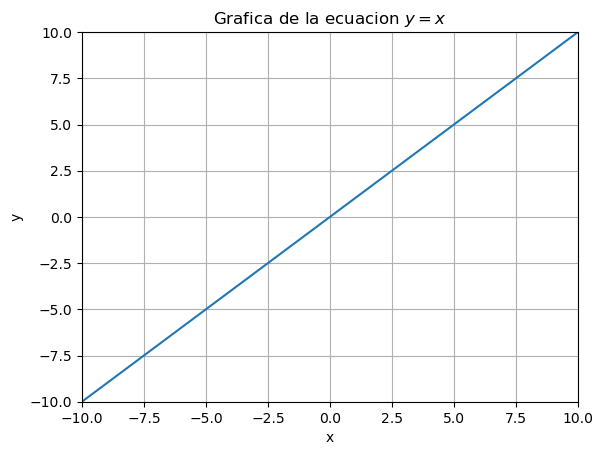

In [259]:
X = np.linspace(-10, 10, 100)

plt.plot(X, X) # x = y

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = x$')
ax = plt.gca()
ax.set_ylim([-10, 10])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


Como introducci√≥n, para graficar la funci√≥n, se crea una lista de 100 valores de x de -10 a 10, para despu√©s calcular cada una de sus im√°genes. Lo restante es propio del m√≥dulo. La funci√≥n graficada tiene los mismos valores en x y y, por lo que se igualaron las dos listas.

La siguiente gr√°fica es para la funci√≥n $y = \sin{x}$.


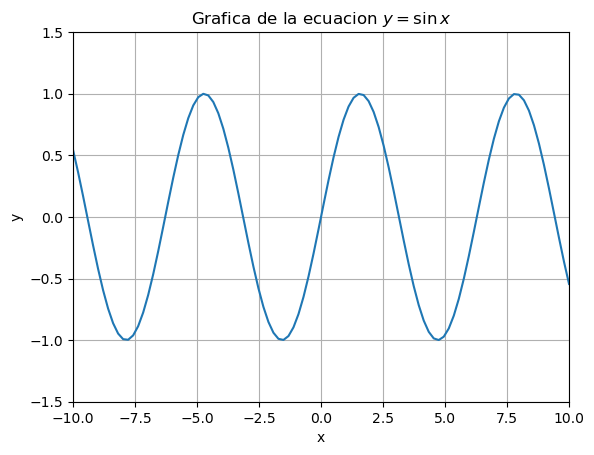

In [261]:
Y = [(lambda x : math.sin(x))(x) for x in X]

plt.plot(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = \sin{x}$')
ax = plt.gca()
ax.set_ylim([-1.5, 1.5])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


### Literal b)

Use el m√©todo de bisecci√≥n para encontrar soluciones precisas dentro de $10^{-5}$ para el primer valor positivo 
de $x$ con $y = 2 \sin{x}$. 

F√°cilmente se ejecuta el anterior algoritmo.

In [263]:
r, i = bisection(a = 0.2, b = 3.5, 
                 equation = lambda x : 2*math.sin(x), tol = 10**(-5), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')

La biseccion dio como resultado la ra√≠z 3.141586494445801 en 18 iteraciones



## Ejercicio 3

### Literal a)

Dibuje las gr√°ficas para $y = \tan{x}$. 

El siguiente c√≥digo ilustra la funci√≥n solicitada:


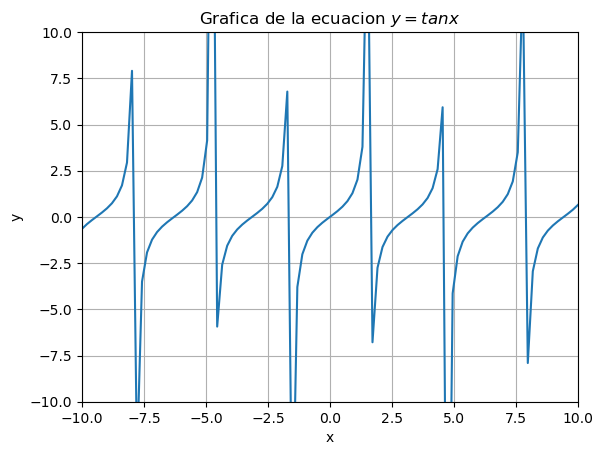

In [265]:
Y = np.tan(X)

plt.plot(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = tan{x}$')
ax = plt.gca()
ax.set_ylim([-10, 10])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


### Literal b)

Use el m√©todo de bisecci√≥n para encontrar una aproximaci√≥n dentro de 10 para el primer valor positivo 
de $x$ con $y = tan(x)$.

F√°cilmente se ejecuta el anterior algoritmo.

In [267]:
r, i = bisection(a = -1.2, b = 1, 
                 equation = lambda x : math.tan(x), tol = 10**(-5), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')

La biseccion dio como resultado la ra√≠z -5.340576171753884e-06 en 17 iteraciones



## Ejercicio 4

### Literal a)

Dibuje las gr√°ficas para $y = x^2 - 1$ y $y = e^{1 - x^2}$

Primero, la gr√°fica para la funci√≥n $y = x^2 - 1$:


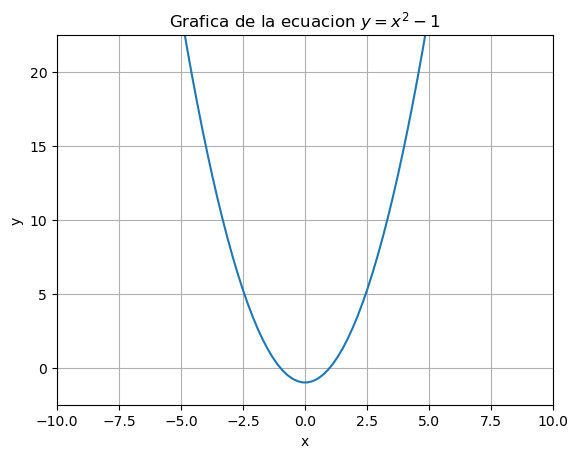

In [269]:
Y = [(lambda x : x**2 - 1)(x) for x in X]

plt.plot(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = x^2 - 1$')
ax = plt.gca()
ax.set_ylim([-2.5, 22.5])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


Por √∫ltimo, la gr√°fica para la funci√≥n $y = e^{1 - x^2}$:


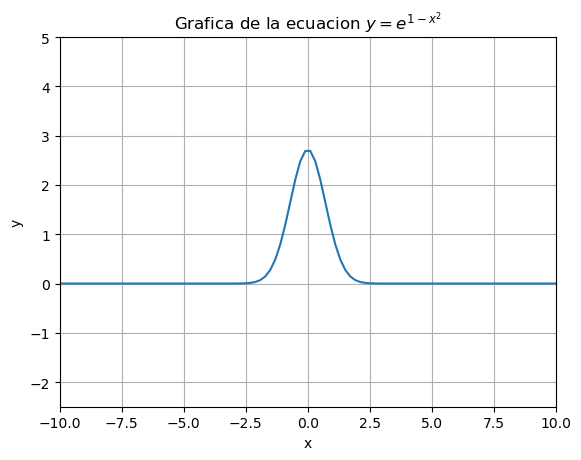

In [271]:
Y = [(lambda x : math.exp(1 - x**2))(x) for x in X]

plt.plot(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de la ecuacion $y = e^{1 - x^2}$')
ax = plt.gca()
ax.set_ylim([-2.5, 5])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


### Literal b)

Use el m√©todo de bisecci√≥n para encontrar una aproximaci√≥n dentro de $10^{-3}$ para un valor (-2, 0) con $x^2 - e^{1 - x^2} - 1$.

Utilizamos la funci√≥n bisecci√≥n:

In [273]:
r, i = bisection(a = -2, b = 0, 
                 equation = lambda x : x**2 - math.exp(1 - x**2) - 1, tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')

La biseccion dio como resultado la ra√≠z -1.2509765625 en 10 iteraciones



## Ejercicio 5

Sea $f(x) = (x + 3)(x + 1)^2x(x - 1)^3(x - 3)$. ¬øEn qu√© cero de $f$ converge el m√©todo de bisecci√≥n cuando 
se aplica en los siguientes intervalos? 

Para (-1.5 ; 2.5):


In [275]:
r, i = bisection(a = -1.5, b = 2.5, 
                 equation = lambda x : (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')

AssertionError: The function does not change sign over the interval.


No converge a ningun cero

Para (-0.5 ; 2.4):


In [ ]:
r, i = bisection(a = -0.5, b = 2.4, 
                 equation = lambda x : (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')


No converge a ningun cero

Para (-0.5 ; 3):


In [ ]:
r, i = bisection(a = -0.5, b = 3, 
                 equation = lambda x : (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')


No converge a ningun cero

Para (-3 ; -0.5):


In [ ]:
r, i = bisection(a = -3, b = -0.5, 
                 equation = lambda x : (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')


Este ejercicio analizado en una gr√°fica, denota que existen raices y son 5, sin embargo, los rangos que pueden tomarse entre estas raices son positivas. Por lo tanto, el m√©todo de la bisecci√≥n no me funcionar√°.

# Ejercicios aplicados

## Ejercicio 1

Un abrevadero de longitud ùêø tiene una secci√≥n transversal en forma de semic√≠rculo con radio ùëü. (Consulte la 
figura adjunta.) Cuando se llena con agua hasta una distancia ‚Ñé a partir de la parte superior, el volumen ùëâ de 
agua es

$$V = L[0.5 \pi r^2 - r^2 \arcsin{\frac{h}{r}} - h(r^2 - h^2)^{\frac{1}{2}}]$$

Suponga que ùêø = 10 ùëêùëö, ùëü = 1 ùëêùëö y ùëâ =12.4 ùëêùëö. Encuentre la profundidad del agua en el abrevadero 
dentro de 0.01 ùëêùëö. 

En el ejercicio, 0.01 cm se puede interpretar como el error absoluto que se puede tolerar al calcular $h$. Entonces primero iniciamos reemplazando los valores en la ecuaci√≥n original, tal que:

$$12.4 = 10[0.5 \pi (1)^2 - 1^2 \arcsin{\frac{h}{1}} - h(1^2 - h^2)^{\frac{1}{2}}]$$

Es complicado solucionar esta ecuaci√≥n anal√≠ticamente, por lo que se utilizar√° el m√©todo de bisecci√≥n. A la anterior ecuaci√≥n se tiene que igualar a cero, para as√≠, calcular las raices que h puede tener.

$$0 = 10[0.5 \pi (1)^2 - 1^2 \arcsin{\frac{h}{1}} - h(1^2 - h^2)^{\frac{1}{2}}] - 12.4$$

Finalmente, se implementa en c√≥digo con una funci√≥n lambda.


In [ ]:
r, i = bisection(a = 0, b = 1, 
                 equation = lambda x : 10 * (0.5 * math.pi - math.asin(x) - x * (1 - x**2)**0.5) - 12.4, 
                 tol = 0.01, N = 20)
print(f'La profundidad del agua (h) es aproximadamente: {r} cm, calculado en {i} iteraciones')


## Ejercicio 2

Un objeto que cae verticalmente a trav√©s del aire est√° sujeto a una resistencia viscosa, as√≠ como a la fuerza 
de gravedad. Suponga que un objeto con masa ùëö cae desde una altura ùë† y que la altura del objeto despu√©s 
de ùë° segundos es 

$$s(t) = s_0 - \frac{mg}{k} t + \frac{m^2g}{k^2} (1 - e^{\frac{-kt}{m}})$$

donde ùëî = 9.81 $\frac{m}{s^2}$ y ùëò representa el coeficiente de la resistencia del aire en $\frac{Ns}{m}$. Suponga $s_0 = 300 m$, $m = 25 kg$ y $k = 0.1 \frac{Ns}{m}$. Encuentre, dentro de 0.01 ùë†ùëíùëîùë¢ùëõùëëùëúùë†, el tiempo que tarda un cuarto de kg en 
golpear el piso. 

Justo como en el anterior ejercicio, se necesita de m√©todos num√©ricos para resolver el problema. Entonces 0.01 segundos es el error absoluto admisible para nuestra ra√≠z. Reemplazamos los datos dados en el enunciado para la f√≥rmula, tal que la ecuaci√≥n est√© respecto al tiempo.

$0 = 300 - \frac{(25)(9.81)}{0.1} t + \frac{(25)^2(9.81)}{(0.1)^2} (1 - e^{\frac{-(0.1)t}{25}})$

Una sustituci√≥n adicional es $s(t) = 0$ debido a que esta funci√≥n representa la altura en la que el objeto se encuentra en cierto momento, pero el problema nos pide el tiempo para cuando colisione con el suelo. Tomando como el sistema de referencia para el eje y el suelo, entonces la altura es cero.

Utilizamos la funci√≥n bisecci√≥n:


In [ ]:
r, i = bisection(a = 7, b = 8, 
                 equation = lambda x : 300 - (25*9.81*x)/0.1 + (625*9.81)*(1 - math.exp(-(0.1)*x/25))/0.1**2, 
                 tol = 0.01, N = 20)
print(f'El tiempo en tocar el suelo (t) es aproximadamente: {r} segundos, calculado en {i} iteraciones')


# Ejercicios te√≥ricos

## Ejercicio 1

Use el teorema 2.1 para encontrar una cota para el n√∫mero de iteraciones necesarias para lograr una 
aproximaci√≥n con precisi√≥n de $10^{-4}$ para la soluci√≥n de $x^3 - x - 1 = 0$ que se encuentra dentro del intervalo 
(1, 2). Encuentre una aproximaci√≥n para la ra√≠z con este grado de precisi√≥n. 

Como no existe un teorema en el documento del deber, entonces utilizaremos el m√©todo de bisecci√≥n con los par√°metros de siempre.


In [ ]:
r, i = bisection(a = 1, b = 2, 
                 equation = lambda x : x**3 - x - 1, 
                 tol = 10**(-4), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')


## Ejercicio 2

La funci√≥n definida por $f(x) = \sin{\pi x}$ tiene ceros en cada entero. Muestre cuando ‚àí1 < ùëé < 0 y 2 < ùëè < 3, el m√©todo de bisecci√≥n converge a

a. 0,ùë†ùëñ ùëé + ùëè < 2  
b. 2,ùë†ùëñ ùëé + ùëè > 2  
c. 1, ùë†ùëñ ùëé +ùëè = 2

### Literal a) 

Para que se cumpla ùëé + ùëè < 2, tomamos como valores: a = -0.99 y b = 2.1 Comprobamos cual es la ra√≠z a la que converge en este caso:


In [ ]:
r, i = bisection(a = -0.99, b = 2.1, 
                 equation = lambda x : math.sin(math.pi * x), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')


### Literal b)

Para que se cumpla ùëé + ùëè > 2, tomamos como valores: a = -0.1 y b = 2.9 Comprobamos cual es la ra√≠z a la que converge en este caso:


In [ ]:
r, i = bisection(a = -0.1, b = 2.9, 
                 equation = lambda x : math.sin(math.pi * x), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')


### Literal c)

Para que se cumpla ùëé + ùëè = 2, tomamos como valores: a = -0.5 y b = 2.5 Comprobamos cual es la ra√≠z a la que converge en este caso:


In [ ]:
r, i = bisection(a = -0.5, b = 2.5, 
                 equation = lambda x : math.sin(math.pi * x), 
                 tol = 10**(-3), N = 20)
print(f'La biseccion dio como resultado la ra√≠z {r} en {i} iteraciones')